# Digit recognition with a CNN

Code to initiliaze Tensorflow 2.0 in Colab

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import datetime
import numpy as np
import matplotlib.pyplot as plt

**Import the MNIST dataset. The default loader will return tensors for the train/test partitions of the images and the labels.**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train[:,:,:,np.newaxis]/255.0
x_test = x_test[:,:,:,np.newaxis]/255.0

**[TODO] Check the size of the loaded tensors**

In [3]:
N = np.unique(y_train).shape[0]
N_train = x_train.shape[0]
N_test = x_test.shape[0]
weight = x_train.shape[1]
height = x_train.shape[2]
print(f'Training set shape: {N_train}')
print(f'Training labels shape: {y_train.shape}')
print(f'Test set shape: {x_test.shape}')
print(f'Test labels shape: {y_test.shape}')
print(f'Number of classes: {N}')

Training set shape: 60000
Training labels shape: (60000,)
Test set shape: (10000, 28, 28, 1)
Test labels shape: (10000,)
Number of classes: 10


**Prepare Keras callback for Tensorboard**

In [4]:
logdir = "logs/scalars/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, update_freq='batch')

**[TODO] Define a Keras Sequential model with the convolutional neural network**

In [5]:
inputs = tf.keras.Input(shape=(height, weight, 1))
h = tf.keras.layers.Conv2D(32, (4, 4),
                           activation='relu',
                           # kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
h = tf.keras.layers.MaxPooling2D()(h)
h = tf.keras.layers.Dropout(0.2)(h)
h = tf.keras.layers.Conv2D(64, (4, 4),
                           activation='relu',
                           # kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))(h)
h = tf.keras.layers.MaxPooling2D()(h)
h = tf.keras.layers.Dropout(0.2)(h)
h = tf.keras.layers.Conv2D(64, (4, 4),
                           activation='relu',
                           # kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None),
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))(h)
h = tf.keras.layers.Dropout(0.2)(h)
h = tf.keras.layers.Flatten()(h)
outputs = tf.keras.layers.Dense(N, activation='softmax')(h)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

**[TODO] Compile the Keras model: specify the optimization algorithm, the loss function and the test metric**

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**[TODO] Train the Keras model**

In [7]:
model.fit(x_train, y_train, batch_size=64, epochs=6)

Epoch 1/6
938/938 [==============================] - 16s 16ms/step - loss: 0.7370 - accuracy: 0.8825
Epoch 2/6
938/938 [==============================] - 17s 18ms/step - loss: 0.6159 - accuracy: 0.9111
Epoch 3/6
938/938 [==============================] - 17s 18ms/step - loss: 0.5947 - accuracy: 0.9134
Epoch 4/6
938/938 [==============================] - 17s 18ms/step - loss: 0.5819 - accuracy: 0.9158
Epoch 5/6
938/938 [==============================] - 17s 18ms/step - loss: 0.5841 - accuracy: 0.9149
Epoch 6/6
938/938 [==============================] - 18s 19ms/step - loss: 0.5702 - accuracy: 0.9168


**[TODO] Print model summary**

In [ ]:
print(model.summary())

**[TODO] Test the Keras model by computing the accuracy the whole test set**

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4425 - accuracy: 0.9625


[0.44250059127807617, 0.9624999761581421]

**[TODO] Visualize test image number 47 and the prediction from the neural network**

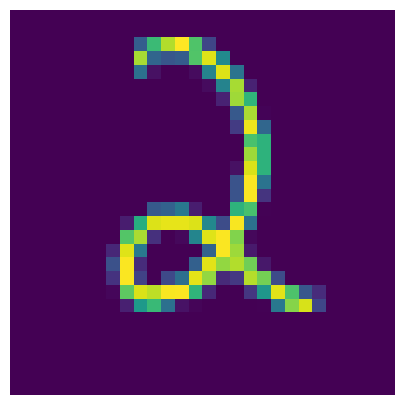

In [45]:
# Showing the image
img_number = 47
plt.figure(figsize=(5, 5))
plt.imshow(x_test[img_number])
plt.axis('off')
plt.show()

In [46]:
# Predicting the image's class
oh_label = model.predict(np.array([x_test[img_number]]))
y_hat = np.argmax(oh_label)
print(f'In the image there\'s the number: {y_hat}')

1/1 [==============================] - 0s 25ms/step
In the image there's the number: 2
